# 데이터사이언스개론 (과제 2) _ 201510147 한수호

# Library Import & Loading Data

In [180]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import eli5
from eli5.sklearn import PermutationImportance
from sklearn.model_selection import cross_val_score


In [2]:
train = pd.read_csv("C:\\Users\\Administrator\\Desktop\\titanic\\train.csv")
test = pd.read_csv("C:\\Users\\Administrator\\Desktop\\titanic\\test.csv")

train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


# Dataset Check

In [3]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

- PassengerId : 승객 번호

- Survived : 생존여부(1: 생존, 0 : 사망)

- Pclass : 승선권 클래스(1 : 1st, 2 : 2nd ,3 : 3rd)

- Name : 승객 이름

- Sex : 승객 성별

- Age : 승객 나이 

- SibSp : 동반한 형제자매, 배우자 수

- Patch : 동반한 부모, 자식 수

- Ticket : 티켓의 고유 넘버

- Fare 티켓의 요금

- Cabin : 객실 번호

- Embarked : 승선한 항구명(C : Cherbourg, Q : Queenstown, S : Southampton)



In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [6]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


- PassengerID 와 Ticket은 분석에 큰 영향을 주지 않을 것이라 판단하여 제거할 것임
- Cabin 은 Null Data가 너무 많아서 제거할 것임

# 1. Target label Check

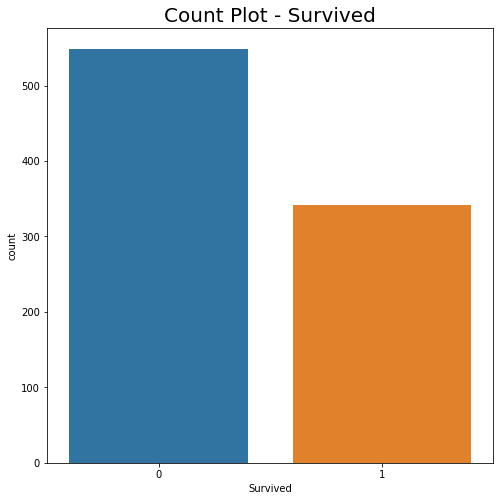

In [7]:
plt.figure(figsize=(8,8))
sns.countplot('Survived', data=train)
plt.xlabel("Survived")
plt.ylabel('count')
plt.title('Count Plot - Survived', fontsize=20)
plt.show()

# 2. EDA and Feature Engineering

## 2-1. Pclass

In [8]:
train[['Pclass','Survived']].groupby(['Pclass'], as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


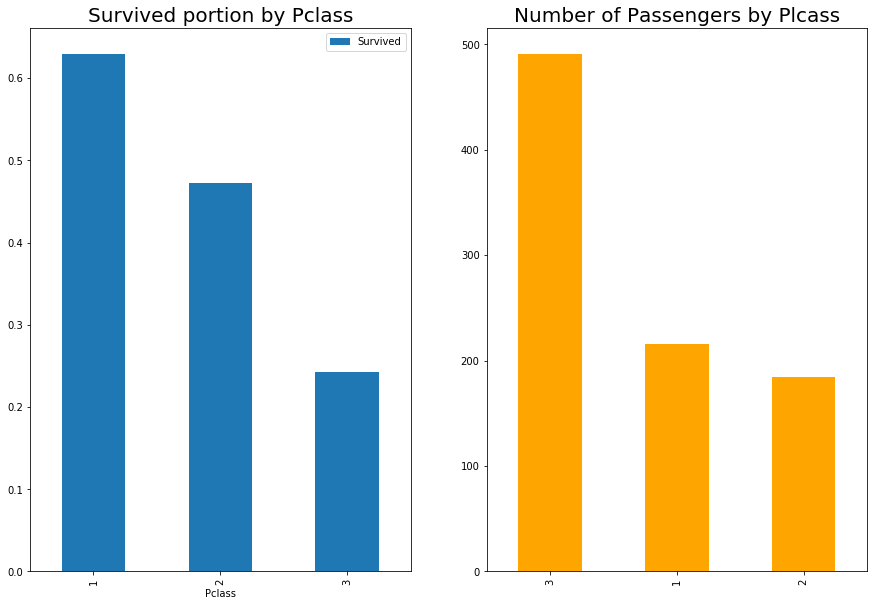

In [9]:
f, ax = plt.subplots(1,2,figsize=(15,10))
train[['Pclass','Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax[0])
train['Pclass'].value_counts().plot.bar(ax=ax[1], color='orange')
ax[0].set_title("Survived portion by Pclass", fontsize=20)
ax[1].set_title('Number of Passengers by Plcass', fontsize=20)
plt.show()

### Pclass별 탑승자 수는 3 < 1 < 2 순이며
### Pclass가 낮아짐에 따라 생존율이 낮아지는 것을 확인할 수 있음

## 2-2. Sex

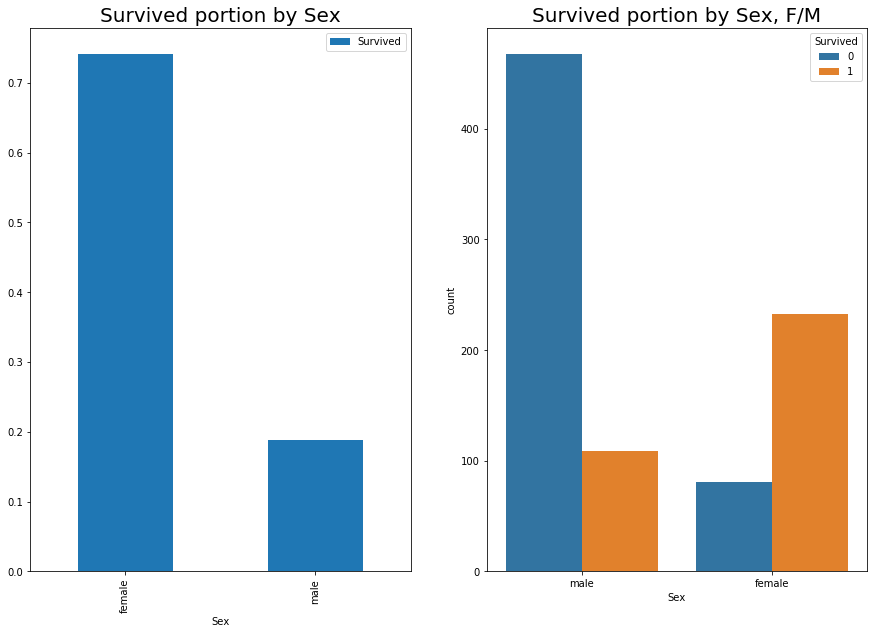

In [10]:
f, ax = plt.subplots(1,2, figsize=(15,10))
train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
sns.countplot('Sex', hue='Survived', data=train, ax=ax[1])

ax[0].set_title('Survived portion by Sex', fontsize=20)
ax[1].set_title('Survived portion by Sex, F/M', fontsize=20)
plt.show()

In [11]:
train[['Sex','Survived']].groupby(['Sex'], as_index=True).mean().sort_values(by='Survived', ascending=False)

,Survived
Sex,
female,0.742038
male,0.188908


Text(0.5, 1, 'Both Sex and Pclass')

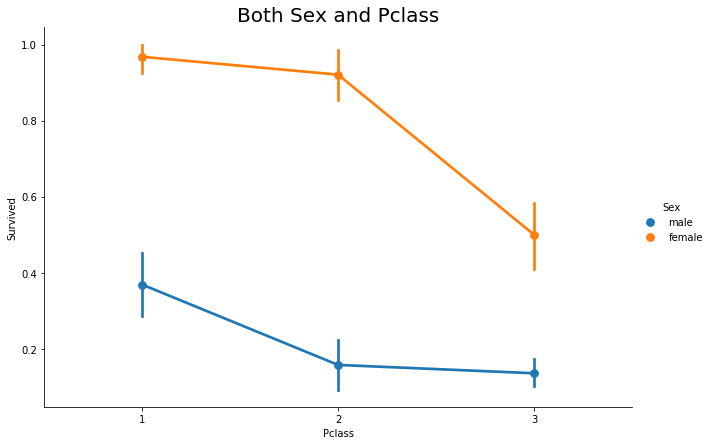

In [12]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=train, size=6, aspect=1.5)
plt.title('Both Sex and Pclass', fontsize=20)

###  여성의 생존율이 남성의 생존율보다 압도적으로 높은 것을 확인할 수 있음

### 문자 데이터를 숫자 데이터로 변환

In [13]:
train['Sex'] = train['Sex'].map({'female':0, 'male':1})
test['Sex'] = test['Sex'].map({'female':0,'male':1})

## 2-3. Age

In [14]:
print('최고령 : {:.1f}세'.format(train['Age'].max()))
print("최연소 : {:.1f}세".format(train['Age'].min()))
print('평균나이 : {:.1f}세'.format(train['Age'].mean()))

최고령 : 80.0세
최연소 : 0.4세
평균나이 : 29.7세


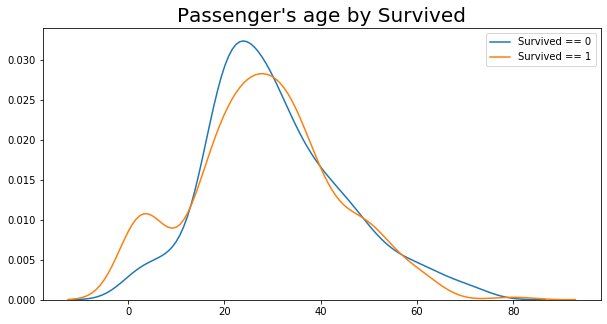

In [15]:
plt.figure(figsize=(10,5))

sns.kdeplot(train[train['Survived']==0]['Age'])
sns.kdeplot(train[train['Survived']==1]['Age'])
plt.legend(['Survived == 0', 'Survived == 1'])
plt.title("Passenger's age by Survived", fontsize=20)
plt.show()

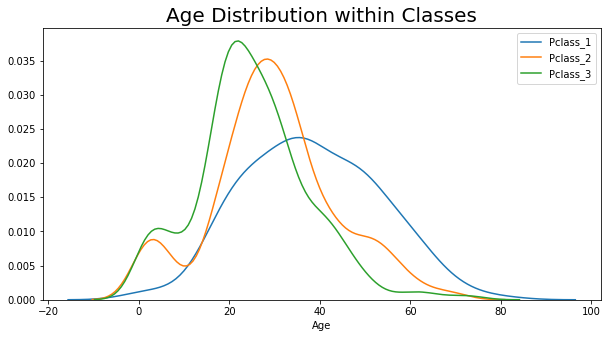

In [16]:
plt.figure(figsize=(10,5))

for i in range(len(train['Pclass'])):
    sns.kdeplot(train[train['Pclass']==i]['Age'])

plt.xlabel("Age")
plt.title('Age Distribution within Classes', fontsize=20)
plt.legend(['Pclass_1','Pclass_2','Pclass_3'])
plt.show()

## 2-4. Name

###  - 각각의 이름에는 남자와 여자 등을 뜻하는 Mr, Mrs 등이 있는데, 이 부분을 가공해서 어떤 데이터가 있는지 확인
### - 성별과 비교하여 Mr, Mrs, Miss 데이터가 비슷한지 확인


- 정규표현식을 사용해서 Initial 추출
- Initial 별 평균나이를 이용해서 결측값 처리

In [17]:
train['Initial'] = train.Name.str.extract('([A-Za-z]+)\.')
test['Initial'] = test.Name.str.extract('([A-Za-z]+)\.')

In [18]:
pd.crosstab(train['Initial'], train['Sex']).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
0,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
1,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [19]:

train['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

test['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

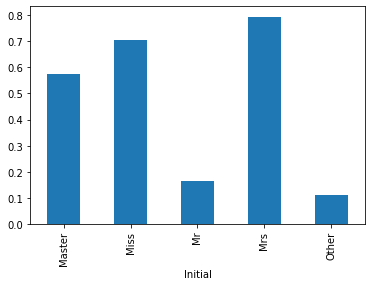

In [20]:
train.groupby('Initial')['Survived'].mean().plot.bar()

In [21]:
train.groupby(['Initial']).mean()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
Initial,,,,,,,,
Master,414.975000,0.575000,2.625000,1.00000,4.574167,2.300000,1.375000,34.703125
Miss,411.741935,0.704301,2.284946,0.00000,21.860000,0.698925,0.537634,43.937188
Mr,455.880907,0.162571,2.381853,0.99811,32.739609,0.293006,0.151229,24.939822
Mrs,456.393701,0.795276,1.984252,0.00000,35.981818,0.692913,0.818898,45.420603
Other,564.444444,0.111111,1.666667,1.00000,45.888889,0.111111,0.111111,19.102778


### Categorized한 Initial Columns의 평균나이로  Age의 Null값 처리

In [22]:
train.loc[(train.Age.isnull())&(train.Initial=='Mr'), 'Age'] = 33
train.loc[(train.Age.isnull())&(train.Initial=='Mrs'), 'Age'] = 36
train.loc[(train.Age.isnull())&(train.Initial=='Master'), 'Age'] = 5
train.loc[(train.Age.isnull())&(train.Initial=='Miss'), 'Age'] = 22
train.loc[(train.Age.isnull())&(train.Initial=='Other'),'Age'] = 46

test.loc[(test.Age.isnull())&(test.Initial=='Mr'),'Age'] = 33
test.loc[(test.Age.isnull())&(test.Initial=='Mrs'),'Age'] = 36
test.loc[(test.Age.isnull())&(test.Initial=='Master'),'Age'] = 5
test.loc[(test.Age.isnull())&(test.Initial=='Miss'),'Age'] = 22
test.loc[(test.Age.isnull())&(test.Initial=='Other'),'Age'] = 46

### Age를 10세 기준으로 categorize

In [23]:
def category_age(x):
    if x<10:
        return 0
    elif x<20:
        return 1
    elif x<30:
        return 2
    elif x<40:
        return 3
    elif x<50:
        return 4
    elif x<60:
        return 5
    elif x<70:
        return 6
    else:
        return 7
    

train['Age_cat'] = train['Age'].apply(category_age)
test['Age_cat'] = test['Age'].apply(category_age)

### 문자 데이터를 숫자 데이터로 변환

In [24]:
train['Initial'] = train['Initial'].map({'Master': 0, 'Miss': 1, 'Mr': 2, 'Mrs': 3, 'Other': 4})
test['Initial'] = test['Initial'].map({'Master': 0, 'Miss': 1, 'Mr': 2, 'Mrs': 3, 'Other': 4})

## 2-4. Embarked

In [25]:
print(train['Embarked'].isnull().sum(),'\n',
     test['Embarked'].isnull().sum())

2 
 0


### Embarked의 경우 Null값이 두 개 밖에 없으므로 최빈값을 채워넣음

In [26]:
train['Embarked'].fillna('S', inplace=True)

<Figure size 864x720 with 0 Axes>

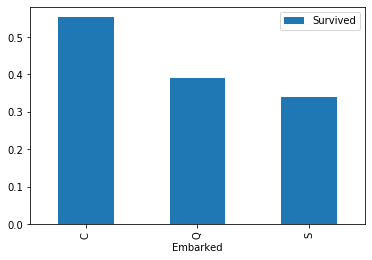

In [27]:
plt.figure(figsize=(12,10))
train[['Embarked', 'Survived']].groupby(['Embarked'],as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar()

#### C의 생존율이 가장 높은 것을 확인할 수 있음

.

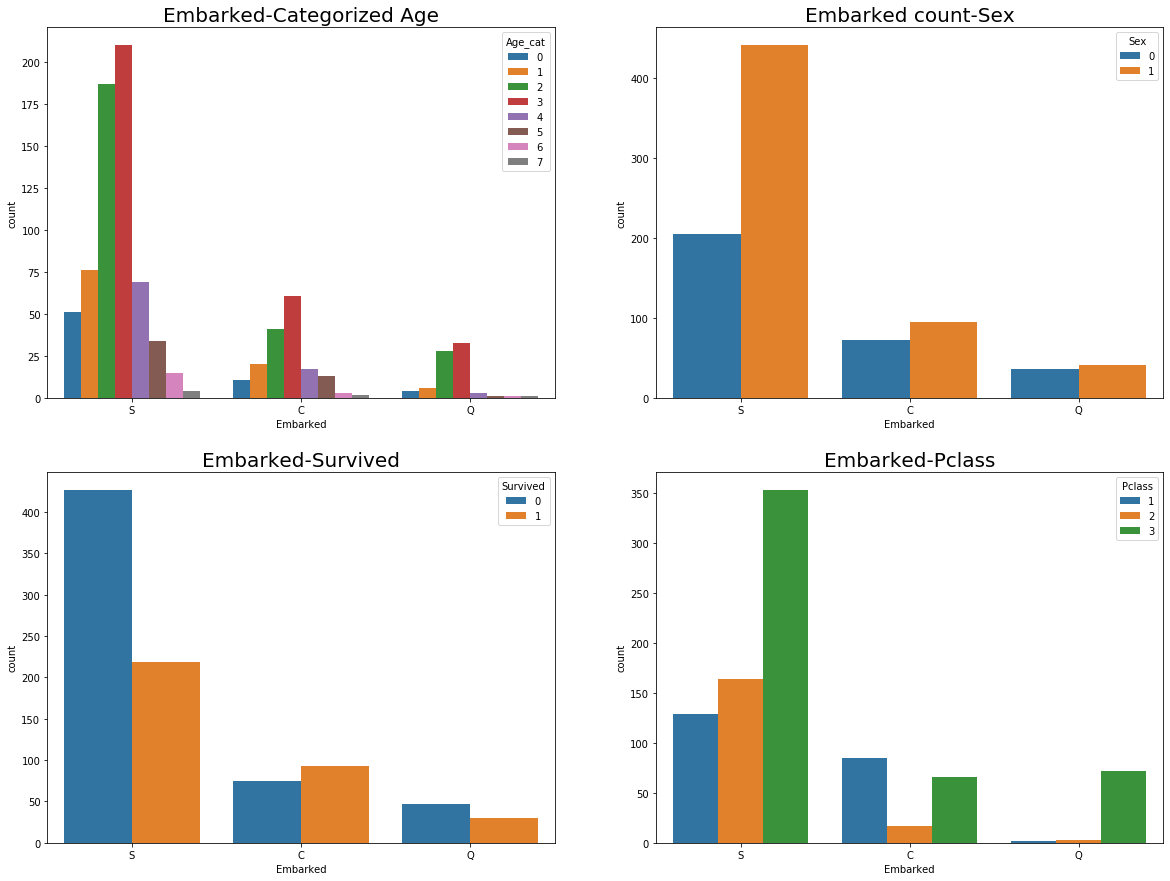

In [28]:
f, ax = plt.subplots(2,2,figsize=(20,15))
hue_list = [['Age_cat','Sex'],
           ['Survived','Pclass']]
title = [['Embarked-Categorized Age', 'Embarked count-Sex'],
        ['Embarked-Survived', 'Embarked-Pclass']]

for i in range(2):
    for j in range(2):
        sns.countplot('Embarked', hue=hue_list[i][j],data=train, ax=ax[i,j])
        ax[i,j].set_title(title[i][j], fontsize=20)
plt.show()

### [1,1] : S의 탑승객이 가장 많음
### [1,2] : C, Q의 경우 남여 비율이 비슷하고 S는 남자의 비율이 높음
### [2,1] : S의 생존확률이 현저히 낮음
### [2,2] : Class로 구분해 본 결과 C의 생존확률이 높은 것은 Pclass가 평균적으로 높기 때문임

.



### 문자 데이터를 숫자 데이터로 변환

In [29]:
train['Embarked'] = train['Embarked'].map({'C':0, 'Q':1, 'S':2})
test['Embarked'] = test['Embarked'].map({'C':0, 'Q':1, 'S':2})

## 2-5. Family size
### 본인 포함 배우자, 자녀, 형제자매 등의 수를 모두 더해 FamilySize로 통합

In [30]:
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1

In [31]:
print('Max size of Family : {:.1f}'.format(train['FamilySize'].max()),'\n',
     'Min size of Family : {:.1f}'.format(train['FamilySize'].min()))

Max size of Family : 11.0 
 Min size of Family : 1.0


<Figure size 720x720 with 0 Axes>

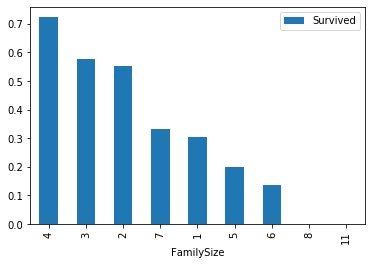

In [32]:
plt.figure(figsize=(10,10))
train[['FamilySize','Survived']].groupby(['FamilySize'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar()
plt.show()

### FamilySize 4<3<2<7<1 순서로 가지만 크게 의미 없는 변수로 간주

## 2-6. Fare

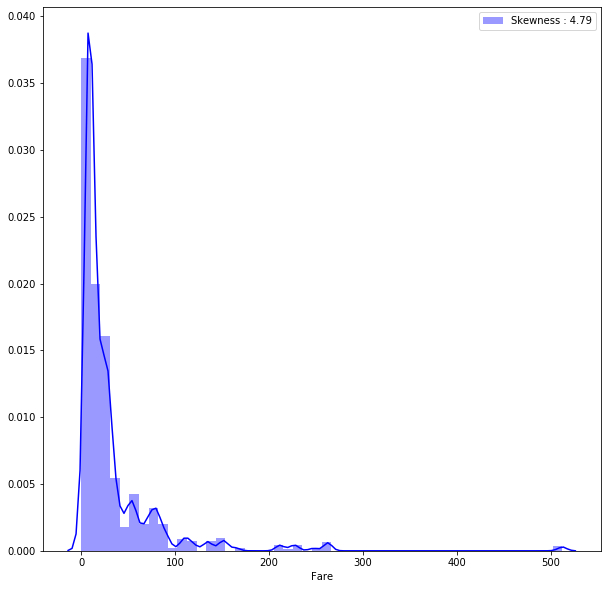

In [33]:
plt.figure(figsize=(10,10))
sns.distplot(train['Fare'], color='b',
             label='Skewness : {:.2f}'.format(train['Fare'].skew()))
plt.legend(loc='best')
plt.show()

### 첨도(Skewness)가 너무 크므로 로그를 취해줌

In [34]:
print(train['Fare'].isnull().sum(), '\n', 
      test['Fare'].isnull().sum())

0 
 1


In [35]:
test.loc[test.Fare.isnull(), 'Fare'] = test['Fare'].mean()

### Null Data는 평균값으로 대체

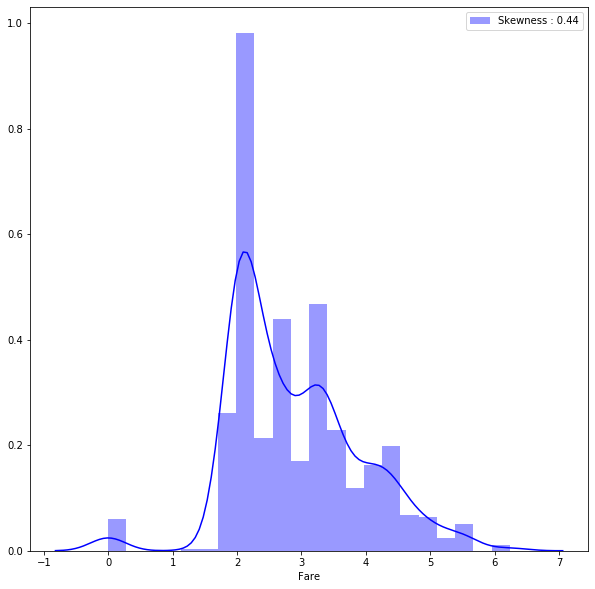

In [36]:
train['Fare'] = train['Fare'].map(lambda i : np.log(i) if i > 0 else 0)
test['Fare'] = test['Fare'].map(lambda i : np.log(i) if i > 0 else 0)

plt.figure(figsize=(10,10))
sns.distplot(train['Fare'], color='b',
             label='Skewness : {:.2f}'.format(train['Fare'].skew()))
plt.legend(loc='best')
plt.show()

# 3. Correlation Between The Features

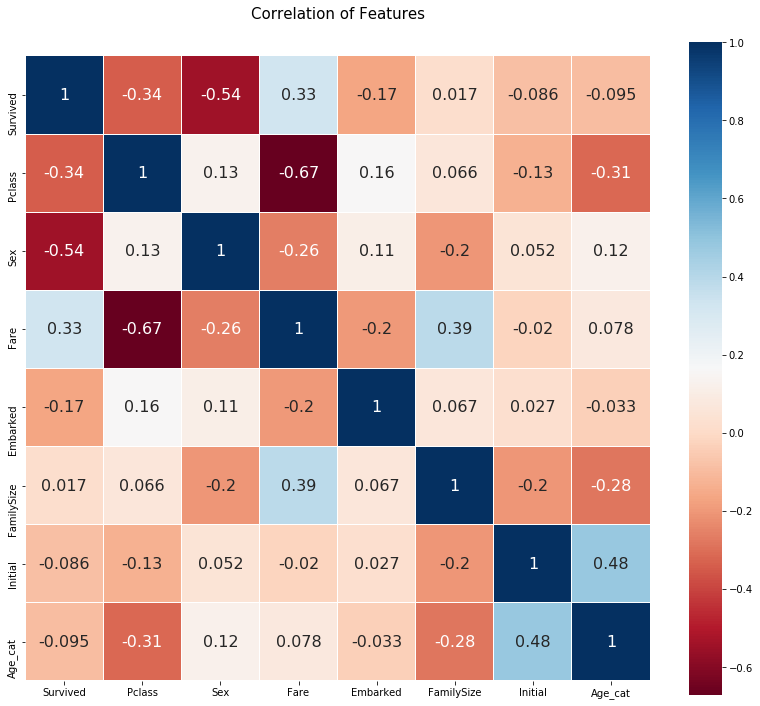

In [37]:
heatmap_data = train[['Survived','Pclass','Sex','Fare','Embarked','FamilySize','Initial','Age_cat']]

colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Correlation of Features', y=1.05, size=15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidth=0.1, vmax=1.0,
            square=True, cmap=colormap, linecolor='white',annot=True, annot_kws={'size':16})

del heatmap_data

# 4. Drop Columns

In [38]:
train.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)
test.drop(['PassengerId', 'Name',  'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [39]:
train.head(3)

,Survived,Pclass,Sex,Age,Fare,Embarked,Initial,Age_cat,FamilySize
0,0,3,1,22.0,1.981001,2,2,2,2
1,1,1,0,38.0,4.266662,0,3,3,2
2,1,3,0,26.0,2.070022,2,1,2,1


In [40]:
test.head(3)

,Pclass,Sex,Age,Fare,Embarked,Initial,Age_cat,FamilySize
0,3,1,34.5,2.057860,1,2,3,1
1,3,0,47.0,1.945910,2,3,4,2
2,2,1,62.0,2.270836,1,2,6,1


# 5. Feature Selection
### 5-1. EDA를 통해 얻은 정보를 바탕으로 주요 변수 추측 : Sex, Age, Pclass, Fare
### 5-2. 위의 히트맵을 통해서 Survived와 상관관계가 높은 네 가지 변수 선택 : Pclass, Sex, Fare, Embarked
### 5-3. Permutation Importance를 통해 주요 변수 추측

* 
Permutation feature importance
칼럼 데이터를 섞어서 연관성을 떨어뜨림(feature를 noise로 만드는 것임)
이를 통해 얼마나 정확도에 영향을 미치는지 알 수 있음(교호작용도 포함)
* 
주의사항 : 무작위로 섞다보면 매우 비현실적인 데이터나 분석결과가 생길 수 있음. 따라서 상관관계가 매우 높을 경우는 고려해봐야함
* 
장점 : 재학습 시킬 필요가 없어서 학습 후에 적용하기 쉬우며 test set에 적용하므로 과적합 우려가 적음
단, feature가 매우 많은 경우 적절히 선택해서 해야함(상관관계 정도에 따라)

# 6. Model Fitting

In [143]:
X_tr = train.drop(['Survived'], axis=1).values
target_label = train['Survived'].values
X_test = test.values

In [144]:
train_X, X_vld, train_y, y_vld = train_test_split(X_tr, target_label, test_size=0.3, random_state=0)

In [171]:
DT_model = DecisionTreeClassifier()
KNN_model = KNeighborsClassifier()

In [146]:
DT_model.fit(train_X, train_y)

prediction_DT_1 = DT_model.predict(X_vld)
print('Accuracy of the Decision Tree_AllFeatures : {:.4f}'.format(metrics.accuracy_score(prediction_DT_1, y_vld)))

Accuracy of the Decision Tree_AllFeatures : 0.7463


In [177]:
scores = cross_val_score(DT_model, train_X, train_y, cv=5)
for iter_count, accuracy in enumerate(scores):
    print("교차 검증 {0} 정확도 : {1:.4f}".format(iter_count, accuracy))
    
print("DT_model 평균 정확도 : {0:.4f}".format(np.mean(scores)))

교차 검증 0 정확도 : 0.7600
교차 검증 1 정확도 : 0.7920
교차 검증 2 정확도 : 0.7520
교차 검증 3 정확도 : 0.7097
교차 검증 4 정확도 : 0.7581
DT_model 평균 정확도 : 0.7543


In [147]:
KNN_model.fit(train_X, train_y)

prediction_KNN_1 = KNN_model.predict(X_vld)
print('Accuracy of the KNN_AllFeatures : {:.4f}'.format(metrics.accuracy_score(prediction_KNN_1, y_vld)))

Accuracy of the KNN_AllFeatures : 0.7500


In [178]:
scores = cross_val_score(KNN_model, train_X, train_y, cv=5)
for iter_count, accuracy in enumerate(scores):
    print("교차 검증 {0} 정확도 : {1:.4f}".format(iter_count, accuracy))
    
print("DT_model 평균 정확도 : {0:.4f}".format(np.mean(scores)))

교차 검증 0 정확도 : 0.7120
교차 검증 1 정확도 : 0.7920
교차 검증 2 정확도 : 0.7600
교차 검증 3 정확도 : 0.7258
교차 검증 4 정확도 : 0.8306
DT_model 평균 정확도 : 0.7641


In [166]:
perm = PermutationImportance(DT_model, random_state=1).fit(X_vld, y_vld)

print(eli5.format_as_text(eli5.explain_weights(perm, feature_names = train.iloc[:,1:].columns.tolist())))

Explained as: feature importances

Feature importances, computed as a decrease in score when feature
values are permuted (i.e. become noise). This is also known as 
permutation importance.

If feature importances are computed on the same data as used for training, 
they don't reflect importance of features for generalization. Use a held-out
dataset if you want generalization feature importances.

0.1179 ± 0.0478  Initial
0.1022 ± 0.0252  Sex
0.0560 ± 0.0226  Pclass
0.0179 ± 0.0256  Embarked
0.0172 ± 0.0257  Fare
0.0075 ± 0.0226  FamilySize
-0.0067 ± 0.0056  Age_cat
-0.0157 ± 0.0449  Age


In [167]:
perm = PermutationImportance(KNN_model, random_state=1).fit(X_vld, y_vld)

print(eli5.format_as_text(eli5.explain_weights(perm, feature_names = train.iloc[:,1:].columns.tolist())))

Explained as: feature importances

Feature importances, computed as a decrease in score when feature
values are permuted (i.e. become noise). This is also known as 
permutation importance.

If feature importances are computed on the same data as used for training, 
they don't reflect importance of features for generalization. Use a held-out
dataset if you want generalization feature importances.

0.0799 ± 0.0434  Age
0.0418 ± 0.0179  FamilySize
0.0388 ± 0.0168  Sex
0.0306 ± 0.0185  Fare
0.0246 ± 0.0174  Pclass
0.0209 ± 0.0168  Embarked
0.0194 ± 0.0137  Initial
0.0097 ± 0.0154  Age_cat


### 5-3. Permutation Importance를 통해 주요 변수 추측
> #### DecisionTree:    Initial, Sex, Pclass, Embarked

> #### KNN:    Age, FamilySize,Sex, Fare


## Sex, Age, Pclass, Fare   네 가지 변수 선택
- 선택 이유 결론에서 설명


# 7. Model Fitting After Feature Selection

In [170]:
X_tr4 = train[['Pclass','Sex','Fare','Age']].values
train_X4, X_vld4, train_y4, y_vld4 = train_test_split(X_tr4, target_label, test_size=0.3, random_state=0)

In [172]:
DT_model.fit(train_X4, train_y4)

prediction_DT_2 = DT_model.predict(X_vld4)
print('Accuracy of the Decision Tree_FourFeatures : {:.4f}'.format(metrics.accuracy_score(prediction_DT_2, y_vld4)))

Accuracy of the Decision Tree_FourFeatures : 0.7799


In [173]:
KNN_model.fit(train_X4, train_y4)

prediction_KNN_2 = KNN_model.predict(X_vld4)
print('Accuracy of the KNN_AllFeatures : {:.4f}'.format(metrics.accuracy_score(prediction_KNN_2, y_vld4)))

Accuracy of the KNN_AllFeatures : 0.7612


In [179]:
scores = cross_val_score(DT_model, train_X4, train_y4, cv=5)
for iter_count, accuracy in enumerate(scores):
    print("교차 검증 {0} 정확도 : {1:.4f}".format(iter_count, accuracy))
    
print("DT_model 평균 정확도 : {0:.4f}".format(np.mean(scores)))

교차 검증 0 정확도 : 0.7360
교차 검증 1 정확도 : 0.7840
교차 검증 2 정확도 : 0.7520
교차 검증 3 정확도 : 0.7419
교차 검증 4 정확도 : 0.7581
DT_model 평균 정확도 : 0.7544


In [176]:
scores = cross_val_score(KNN_model, train_X4, train_y4, cv=5)
for iter_count, accuracy in enumerate(scores):
    print("교차 검증 {0} 정확도 : {1:.4f}".format(iter_count, accuracy))
    
print("평균 정확도 : {0:.4f}".format(np.mean(scores)))

교차 검증 0 정확도 : 0.7360
교차 검증 1 정확도 : 0.7920
교차 검증 2 정확도 : 0.7760
교차 검증 3 정확도 : 0.7339
교차 검증 4 정확도 : 0.8065
평균 정확도 : 0.7689


# 성능 비교

## 1. All Features
> ### DecisionTree Model's Mean Accuracy : 0.7543
> ### KNN model's Accuracy : 0.7641

## 2. Four Features
> ### DecisionTree Model's Accuracy : 0.7662
> ### KNN model's Accuracy : 0.7689

# 결론
### - 타이타닉 데이터에서 Decision Tree와 KNN model 을 비교했을 때 평균 정확도는 Feature 선택 여부에 관계없이 KNN이 앞선 결과를 보여줌
### - EDA, CorrMatrix, Permutation Importance등을 통해서 중복적으로 나온 변수들을 선택한 후, Sex-Initial처럼 변수간 영향이 있을 것으로 판단되는 것들은(Pclass-Embarked, Fare-FamilySize 등) 중요도가 더 크다고 판단한 것을 선택했음